In [1]:
import numpy as np
import matplotlib as mpl
mpl.use('tkagg')
import mpl_toolkits.mplot3d
from scipy import interpolate as interp
import matplotlib.pyplot as plt

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
train_1_path = r'D:/task_2/training-1.txt'
train_2_path = r'D:/task_2/training-2.txt'

f = open(train_2_path, 'r')
lines = f.readlines()
f.close()

In [31]:
servs = []
num_servs = int(lines[0].rstrip('\n'))
for line in lines[1:num_servs+1]:
    line = line.lstrip('(').rstrip(')\n').split(', ')
    servs.append([int(line[1]), int(line[2]), int(line[3]), int(line[4])])
servs = np.array(servs)
print('num servs:', num_servs)

num servs: 100


In [7]:
import sklearn.linear_model as lm

In [45]:
model = lm.LinearRegression()

In [46]:
model.fit(servs[:, :2], servs[:, 2])

LinearRegression()

In [47]:
model.coef_[0] / model.coef_[1]

2.080205363907859

In [48]:
model.intercept_

-6885.819223471874

In [54]:
model.predict([[416, 390]])

array([123459.86112153])

In [ ]:
plt.bar

In [69]:
servs[0]

array([   300,    830, 170076,    177])

In [70]:
model.predict(servs[:10, :2])[0]

144090.6574044695

In [75]:
 model.predict(servs[:10, :2])

array([144090.65740447,  89280.35092628, 135116.89854594, 174254.77387162,
       150241.49608463,  53921.16104879, 193484.77162161, 195469.25015445,
        85581.08168496, 142270.27078357])

In [73]:
servs[:10]

array([[   300,    830, 170076,    177],
       [   102,    714,  73229,    159],
       [   170,   1014, 164248,    171],
       [   456,    796, 170212,    256],
       [   490,    494, 121705,    265],
       [   170,    232,  64122,     68],
       [   870,    120, 236918,    247],
       [   834,    214, 164051,    354],
       [   356,    150, 101230,    106],
       [   630,    126, 142266,    213]])

In [77]:
servs[:10, 0]+2

array([302, 104, 172, 458, 492, 172, 872, 836, 358, 632])

In [78]:
servs[:10, 2]

array([170076,  73229, 164248, 170212, 121705,  64122, 236918, 164051,
       101230, 142266])

In [79]:
servs[:10, 0]

array([300, 102, 170, 456, 490, 170, 870, 834, 356, 630])

In [91]:
servs[:10, 0]+2

array([302, 104, 172, 458, 492, 172, 872, 836, 358, 632])

In [92]:
model.predict(servs[:10, :2])

array([144090.65740447,  89280.35092628, 135116.89854594, 174254.77387162,
       150241.49608463,  53921.16104879, 193484.77162161, 195469.25015445,
        85581.08168496, 142270.27078357])

In [93]:
pre = model.predict(servs[:10, :2])

In [107]:
servs[:10, 0][6:]

array([870, 834, 356, 630])

In [108]:
pre[6:]

array([193484.77162161, 195469.25015445,  85581.08168496, 142270.27078357])

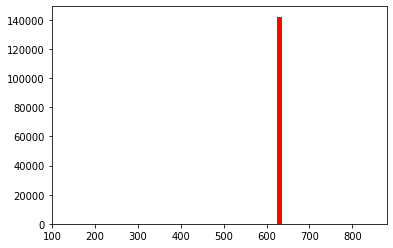

In [143]:
ax = plt.gca()
ax.bar([630], [142270], width=10, color='r')
ax.set_xlim([100, 880])
plt.show()

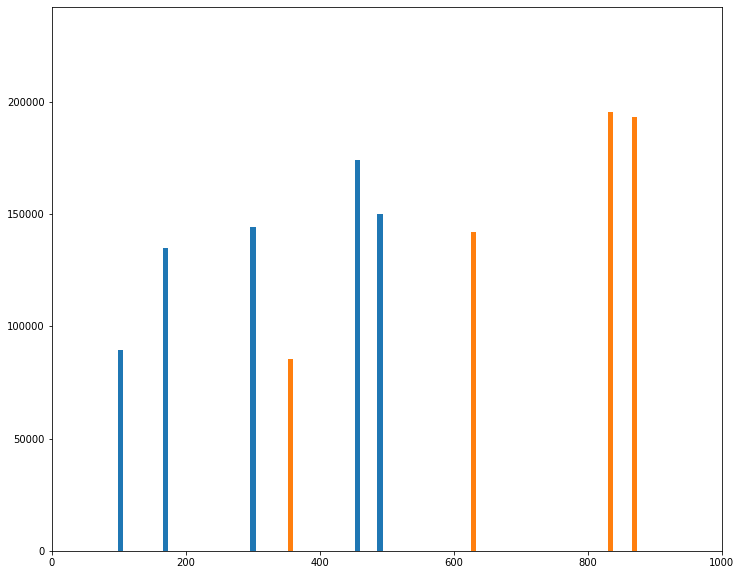

In [146]:
fig = plt.gcf()
ax = fig.gca()
ax.bar(servs[:10, 0][:5], pre[:5], width=8)

ax.set_xlim([0, 1000])
ax.set_ylim([0, 242270])
fig.set_figwidth(12)
fig.set_figheight(10)
plt.show()

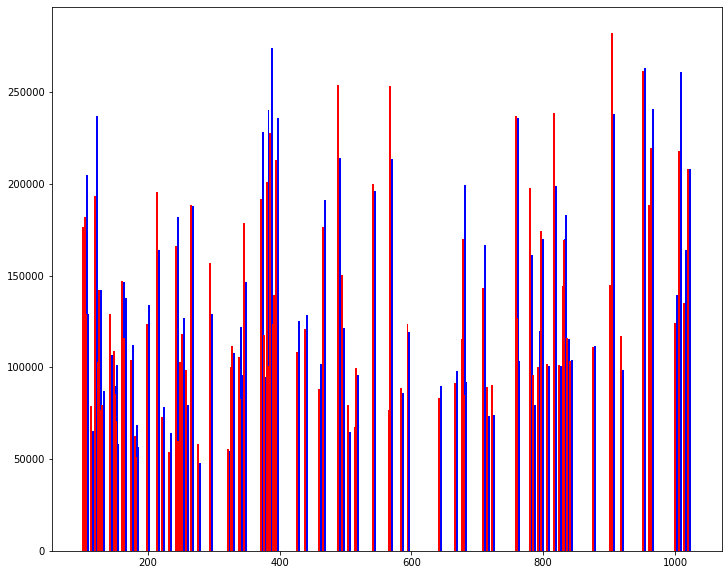

In [155]:
plt.bar(servs[:, 1]+3, servs[:, 2], width=3, color='b')
plt.bar(servs[:, 1], model.predict(servs[:, :2]), width=3, color='r')

fig = plt.gcf()
fig.set_figwidth(12)
fig.set_figheight(10)
plt.show()

In [183]:
vm_names = []
vms = []
num_vms = int(lines[num_servs+1].rstrip('\n'))
line_vm_start = num_servs + 1
for line in lines[line_vm_start + 1 : line_vm_start + num_vms + 1]:
    line = line.lstrip('(').rstrip(')\n').split(', ')
    vm_names.append(line[0])
    vms.append([int(line[1]), int(line[2]), int(line[3])])
vms = np.array(vms)
print('num vms:', num_vms)

num vms: 1000


In [52]:
for (auto &i in range(num_reqs)):

SyntaxError: invalid syntax (<ipython-input-52-3a9c68ceb100>, line 1)

In [184]:
num_days, k = map(int, lines[line_vm_start + num_vms + 1].rstrip('\n').split())
line_req_start = line_vm_start + num_vms + 2;

reqs = []
for i in range(num_days):
    n = int(lines[line_req_start].rstrip('\n'))
    for j in range(line_req_start + 1, line_req_start + n + 1):
        line = lines[j].rstrip(')\n').lstrip('(').split(', ')
        if len(line) == 2:
            reqs.append([i, 0, int(line[1])])
        else:
            reqs.append([i, 1, vm_names.index(line[1]), int(line[2])])
    line_req_start = line_req_start + n + 1
print('num days:', num_days)
print('k:', k)
print('num reqs:', len(reqs))

num days: 1000
k: 82
num reqs: 169322


In [185]:
vm_ins = []
day_range = range(500, 700)
for req in reqs:
    if req[0] in day_range:
        if (req[1] == 1):
            vm_ins.append(req[2])
vm_ins = np.array(vm_ins)
print("num adds:", len(vm_ins))

num adds: 19938


In [186]:
vm_ins_core_mem_ratios = vms[vm_ins][:, :2]
vm_ins_core_mem_ratios = vm_ins_core_mem_ratios[:, 0] / vm_ins_core_mem_ratios[:, 1]

vm_core_mem_ratios = vms[:, 0] / vms[:, 1]

serv_core_mem_ratios = servs[:, 0] / servs[:, 1]

In [153]:
np.median(vm_ins_core_mem_ratios)

1.0449949443882711

In [157]:
size_mid = np.median(servs[:, 0] + servs[:, 1])

In [158]:
np.argsort(np.abs(servs[:, 0] + servs[:, 1] - size_mid))

array([ 1, 12, 89, 41, 90, 23, 24, 82, 64, 62,  9, 71, 27, 92, 80, 70, 32,
       77, 93, 37, 87, 86, 51, 43, 49, 54, 75, 53, 57, 22, 30, 31, 16, 47,
       39, 91, 59, 95, 34, 42, 10,  4,  6, 69, 96, 45, 18, 29, 85, 52, 63,
       76, 28, 40,  7, 48, 73, 97, 50, 58, 19, 94,  0,  8, 79, 44, 20, 84,
       88, 61, 14, 68, 11, 17,  2, 99, 74, 46, 72, 21, 60, 67,  5, 56, 65,
        3, 38, 78, 35, 33, 26, 36, 25, 13, 15, 81, 66, 83, 55, 98],
      dtype=int64)

In [156]:
np.argsort(np.abs(servs[:, 0] / servs[:, 1] - np.median(vm_ins_core_mem_ratios)))

array([34, 82, 30, 41, 13, 98, 38, 31,  4, 35, 66, 44, 86, 12, 27, 55, 22,
       56, 46, 72, 62, 58, 40, 33,  5, 88, 18, 99, 81,  3, 83, 37, 69, 48,
       97, 65, 67, 15, 70, 59, 64, 47, 26, 25, 95, 14,  0, 87, 17, 29, 79,
       42, 61, 80, 43, 74, 91, 90, 45, 21, 52, 92,  2, 24, 89, 77, 51, 96,
       73,  1, 75, 16, 94, 71, 19, 36, 76, 20, 93, 60, 78,  8, 63, 11, 53,
       84, 49, 28, 10, 68, 85, 50,  7, 57, 23,  9, 39,  6, 32, 54],
      dtype=int64)

In [122]:
vm_ins_core_mem_ratios.mean()

2.4875748001779607

In [123]:
vm_ins_core_mem_ratios.std()

5.300859494719686

In [38]:
serv_core_mem_ratios[[22, 55, 46, 62]]

array([0.81770833, 0.82563025, 0.7804878 , 0.77464789])

# 待解决的问题

1. 在输出状态中，基本都是剩余的核心数少于内存数。为什么？是不是 select 函数出了问题？
1. 把迁移优化到最好，保证每次迁移完后，即使是 490, 494 这样的垃圾服务器，也能几乎满载，空出来许多。
1. 有关选型问题，是否选择保证比例的情况下，大小适中的服务器会好一些？
1. 对于 training-2 数据集，是否选择比较杂的服务器会好一些？
1. 在输出状态中，增添每个服务器当前的虚拟机型号（核心数 内存数 节点型号）以及数量，观察是什么情况让这个服务器满了或不满
1. 如果在一天的开始，那么 select 时需要条件严格一些，尽量 best fitting，在一天快要结束时，条件可以放宽些，比如单节点虚拟机也可以放到空余的双节点服务器上。因为不想启用或购买新服务器。在第二天迁移时，需要对这些情况做处理。

In [160]:
vm_ins.shape

(9900,)

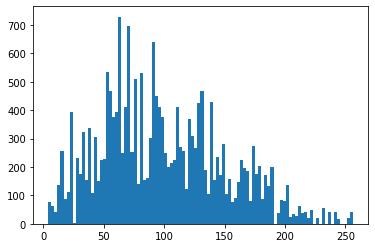

In [202]:
plt.hist(vms[vm_ins][:, 0] + vms[vm_ins][:, 1], bins=100)
plt.show()

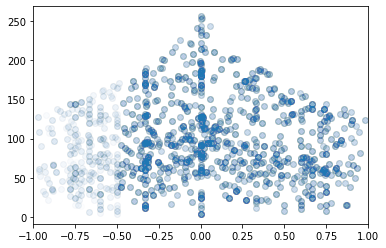

In [187]:
plt.plot((vms[vm_ins][:, 0] - vms[vm_ins][:, 1]) / (vms[vm_ins][:, 0] + vms[vm_ins][:, 1]), vms[vm_ins][:, 0] + vms[vm_ins][:, 1], 'o', alpha=0.01)
ax = plt.gca()
ax.set_xlim([-1, 1])
plt.show()

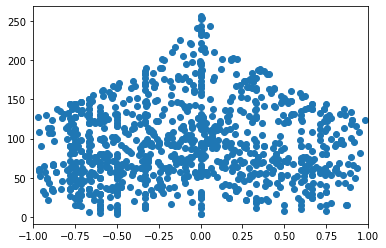

In [136]:
plt.plot((vms[:, 0] - vms[:, 1]) / (vms[:, 0] + vms[:, 1]), vms[:, 0] + vms[:, 1], 'o')
ax = plt.gca()
ax.set_xlim([-1, 1])
plt.show()

核心的中间数：$mid(cores) = (median(cores) + mean(cores)) / 2$

内存的中间数：$mid(mems) = (median(mems) + mean(mems)) / 2$

尺寸：$sizes = mems + cores$

尺寸的中间数：$mid(sizes) = (median(sizes) + mean(sizes)) / 2$

每个服务器的大小评价：$caps = \dfrac{(cores - mid(cores))^2 + (mems - mid(mems))^2 + (sizes - mid(sizes))^2}{3} $

服务器到“中间服务器”的距离：$dis = ((caps - median(caps)) + (caps - mean(caps))) / 2$

这个距离越小，说明服务器越“适中”。

In [234]:
mid_core_mem_sums

852.5899999999999

In [253]:
np.argsort(sizes)[49]

92

In [259]:
np.argsort(np.abs(servs[:, 0] - mid_cores))

array([12, 69, 86, 18, 82, 30,  8, 97, 67, 31, 68, 34, 65, 41, 84, 95, 62,
       11, 63, 37, 22, 26, 50,  0,  3, 43, 85, 74, 61, 27,  4, 10, 44, 88,
       29, 40, 15, 53, 64, 87, 70, 72, 47, 59, 21, 83, 48, 57, 46, 33, 38,
       39,  5,  2, 81, 99, 45, 35, 80, 42, 93, 14, 90, 73, 58, 96, 94,  9,
       79, 23, 91, 51, 77, 17, 92, 16, 89, 75,  1, 71, 52, 24, 49, 76, 56,
       19, 66, 13, 28, 20, 55, 32, 54, 60,  7,  6, 78, 98, 25, 36],
      dtype=int64)

In [277]:
servs[24]

array([   98,   680, 91928,   139])

In [267]:
np.argsort(sizes)

array([12, 62, 41, 82, 22, 31, 30,  4, 86, 27, 34, 70, 64, 37, 47, 59, 40,
       48, 18, 69, 95, 43, 42, 58, 80, 44, 88, 97, 87, 79, 99, 14, 46, 63,
       53, 17, 91, 52, 93,  8,  5, 72, 10, 74, 85, 84, 11, 90, 38, 92, 76,
       56, 50, 29, 68, 35,  3, 57, 24, 67, 49, 19,  1, 33, 65, 89, 23,  0,
       39, 20,  9, 77, 71, 28, 45, 51, 60, 75, 61, 16, 96, 13,  7, 26, 66,
       78, 73, 32, 81, 54, 25, 15, 83,  6, 21, 36,  2, 94, 55, 98],
      dtype=int64)

In [284]:
sizes[2]

0.5577561721302536

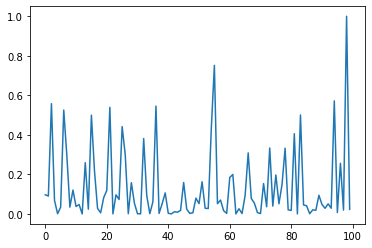

In [289]:
plt.plot(sizes)

In [363]:
ratio_scr

array([6.91248771e-01, 9.72222222e-01, 9.35060060e-01, 4.93787717e-01,
       2.26287263e-01, 3.76451078e-01, 5.35353535e-01, 3.69380831e-01,
       1.84892402e-01, 4.44444444e-01, 2.76248726e-01, 2.13901126e-01,
       2.90514905e-01, 2.16972878e-01, 6.34502924e-01, 5.59050532e-01,
       9.98120742e-01, 7.20019579e-01, 5.18042158e-02, 1.09914223e-01,
       1.22605364e-01, 8.88888889e-01, 3.22508755e-01, 3.75767728e-01,
       9.70294202e-01, 2.04444444e-02, 5.89743590e-01, 1.11111111e-01,
       2.67221156e-01, 7.21236029e-01, 1.93486590e-01, 2.22222222e-01,
       5.51613698e-01, 3.76068376e-01, 2.01201201e-01, 2.45751634e-01,
       1.10199118e-01, 5.22003404e-01, 2.22222222e-01, 4.67836257e-01,
       3.70870871e-01, 1.89964158e-01, 7.44880832e-01, 6.79186228e-02,
       1.39577594e-01, 8.87560868e-01, 3.45509893e-01, 5.80822805e-01,
       5.53280243e-01, 2.55099592e-01, 3.44211344e-01, 9.70595324e-01,
       9.01960784e-01, 2.16871262e-01, 5.53639847e-01, 3.17734305e-01,
      

In [301]:
mid_cores = (np.median(servs[:, 0]) + np.mean(servs[:, 0])) / 2
mid_mems = (np.median(servs[:, 1]) + np.mean(servs[:, 1])) / 2
core_mem_sums = servs[:, 0] + servs[:, 1]
mid_core_mem_sums = (np.median(core_mem_sums) + np.mean(core_mem_sums)) / 2
size_scrs = np.sqrt((servs[:, 0] - mid_cores)**2 + (servs[:, 1] - mid_mems)**2 + (core_mem_sums - mid_core_mem_sums)**2)
size_scrs = (size_scrs - np.min(size_scrs)) / (size_scrs.max() - size_scrs.min())
# size_scrs = size_scrs**2  # 给 size_scrs 乘个指数，可以更好地拉开大服务器与小服务器尺寸的得分
np.argsort(size_scrs)[59]

14

In [312]:
vm = vms[700]
vm

array([14, 40,  1])

In [357]:
vm = np.array([22, 14])
vm

array([22, 14])

In [354]:
242 / 494

0.4898785425101215

In [361]:
np.argsort(serv_scrs)

array([27, 69, 95, 41, 43, 82, 86, 18, 12, 30, 58,  4, 93, 31, 34, 76, 62,
       22, 53, 19, 63, 44, 74, 56, 72, 20, 49,  8, 10, 85, 40, 60, 84, 11,
       37, 28, 57, 23, 50, 70, 68, 64, 38, 88, 25, 78, 46, 47, 35, 59,  9,
       48, 39, 97,  5,  7, 36, 99, 33, 87, 13,  3, 42, 67, 80, 32, 66, 65,
       29, 54, 14,  6,  0, 79, 17, 91, 90, 52, 92, 81, 26, 98, 61, 55, 24,
       45,  1, 89, 83, 15, 77, 51, 71, 75, 16, 96, 73, 21,  2, 94],
      dtype=int64)

In [353]:
servs[70]

array([  242,   494, 77102,   167])

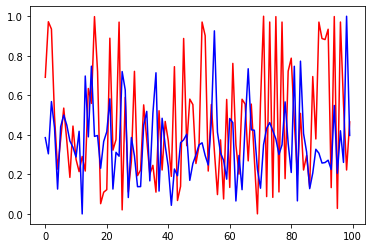

In [360]:
plt.plot(ratio_scrs, 'r')
plt.plot(size_scrs, 'b')
plt.show()


In [365]:
(vm[0] - vm[1]) / (vm[0] + vm[1])

0.2222222222222222

In [366]:
serv_scrs = ratio_scrs + size_scrs
serv_scrs

array([1.07709748, 1.27625671, 1.50342468, 0.92968009, 0.35201183,
       0.81791627, 1.03533219, 0.81824736, 0.55398842, 0.78153713,
       0.56434585, 0.63188197, 0.29051491, 0.91457394, 1.02443221,
       1.30637098, 1.39031639, 1.11663842, 0.2827415 , 0.47660289,
       0.53812374, 1.47105562, 0.44835965, 0.68729717, 1.26227667,
       0.74052715, 1.21720674, 0.19405763, 0.65359864, 1.01453576,
       0.33131838, 0.3604062 , 1.00011336, 0.89486798, 0.36835674,
       0.75478033, 0.82418046, 0.63760318, 0.70611512, 0.81392602,
       0.60980446, 0.23350168, 0.97210279, 0.26105046, 0.49967115,
       1.26262204, 0.74866626, 0.75058011, 0.80849986, 0.55379903,
       0.69324293, 1.33039618, 1.19770077, 0.4644776 , 1.01985003,
       1.24381761, 0.51100659, 0.68227243, 0.34679771, 0.75488659,
       0.61646681, 1.22312498, 0.4146592 , 0.49772644, 0.70263221,
       1.00618654, 1.00272494, 0.98108087, 0.70099691, 0.22658749,
       0.69463729, 1.35048638, 0.52085994, 1.4326628 , 0.50495

In [323]:
np.argsort(serv_scrs)

array([64, 37, 70, 12, 47, 62, 59, 87, 80, 42, 22, 48, 97, 90, 91, 29, 41,
       82, 92, 52, 40,  4, 79, 24, 31,  1, 89,  0, 14, 17, 30, 45, 34, 77,
       51, 88, 27, 71, 67, 86, 99, 61, 75, 65, 16,  3, 96, 46, 73,  5, 21,
        2, 33, 94, 26, 18, 58, 44, 38, 35, 69, 95, 15, 56, 43, 81, 83, 72,
       66, 93, 13, 76, 19, 74, 55, 53, 20, 63,  8, 60, 49, 98, 25, 10, 11,
       84, 85, 28, 78, 36, 68, 50, 57, 23,  7,  9, 39, 32,  6, 54],
      dtype=int64)

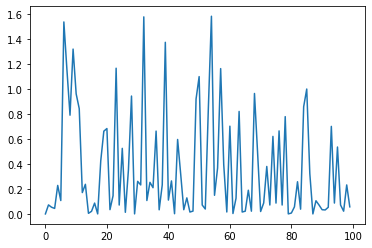

In [314]:
plt.plot(ratio_scrs)
plt.show()

In [358]:
serv_ratio = (servs[:, 0] - servs[:, 1]) / (servs[:, 0] + servs[:, 1])
vm_ratio = (vm[0] - vm[1]) / (vm[0] + vm[1])
ratio_scrs = np.abs(serv_ratio - vm_ratio)
ratio_scrs

array([6.91248771e-01, 9.72222222e-01, 9.35060060e-01, 4.93787717e-01,
       2.26287263e-01, 3.76451078e-01, 5.35353535e-01, 3.69380831e-01,
       1.84892402e-01, 4.44444444e-01, 2.76248726e-01, 2.13901126e-01,
       2.90514905e-01, 2.16972878e-01, 6.34502924e-01, 5.59050532e-01,
       9.98120742e-01, 7.20019579e-01, 5.18042158e-02, 1.09914223e-01,
       1.22605364e-01, 8.88888889e-01, 3.22508755e-01, 3.75767728e-01,
       9.70294202e-01, 2.04444444e-02, 5.89743590e-01, 1.11111111e-01,
       2.67221156e-01, 7.21236029e-01, 1.93486590e-01, 2.22222222e-01,
       5.51613698e-01, 3.76068376e-01, 2.01201201e-01, 2.45751634e-01,
       1.10199118e-01, 5.22003404e-01, 2.22222222e-01, 4.67836257e-01,
       3.70870871e-01, 1.89964158e-01, 7.44880832e-01, 6.79186228e-02,
       1.39577594e-01, 8.87560868e-01, 3.45509893e-01, 5.80822805e-01,
       5.53280243e-01, 2.55099592e-01, 3.44211344e-01, 9.70595324e-01,
       9.01960784e-01, 2.16871262e-01, 5.53639847e-01, 3.17734305e-01,
      

In [208]:
core_mid = np.median(servs[:, 0])
core_mid

355.0

In [209]:
mem_mid = np.median(servs[:, 1])
mem_mid

410.0

In [210]:
size_mid = np.median(servs[:, 0] + servs[:, 1])
size_mid

818.0

In [225]:
servs[:, 1].mean()

488.14

In [214]:
core_mem_dis = (servs[:, 0] - core_mid)**2 + (servs[:, 1] - mem_mid)**2
core_mem_dis = (core_mem_dis - core_mem_dis.min()) / (core_mem_dis.max() - core_mem_dis.min())
core_mem_dis

array([0.32787078, 0.28563454, 0.73116447, 0.29072492, 0.04480715,
       0.11941472, 0.63986808, 0.49026363, 0.12252183, 0.2853701 ,
       0.14297887, 0.14596111, 0.00116058, 0.53097202, 0.10229251,
       0.72356195, 0.4517809 , 0.11403786, 0.04095814, 0.27606344,
       0.33172713, 0.72356195, 0.00271047, 0.25815527, 0.25354234,
       0.655602  , 0.56842639, 0.03244478, 0.3619389 , 0.24206877,
       0.00791838, 0.00605264, 0.53623135, 0.33625192, 0.01175269,
       0.16625655, 0.7131755 , 0.06280346, 0.1488038 , 0.25941134,
       0.02686225, 0.0059498 , 0.08587547, 0.06370695, 0.07916908,
       0.39585277, 0.09656307, 0.03760862, 0.04554169, 0.24898082,
       0.16447161, 0.39124718, 0.13953386, 0.12390278, 0.57425866,
       0.87896194, 0.24391247, 0.2089629 , 0.13900499, 0.03743968,
       0.41318065, 0.45616612, 0.        , 0.1109895 , 0.04164126,
       0.33224131, 0.57895974, 0.30623848, 0.15958689, 0.0488251 ,
       0.03478797, 0.37653428, 0.1215302 , 0.56360044, 0.12936

In [215]:
np.argsort(core_mem_dis)

array([62, 12, 22, 82, 41, 31, 30, 34, 86, 40, 27, 70, 59, 47, 18, 64,  4,
       48, 69, 95, 37, 43, 44, 42, 99, 46, 79, 14, 63, 17,  5, 72, 80,  8,
       53, 74, 58, 52, 84, 10, 11, 85, 91, 38, 93, 87, 68, 97, 50, 88, 35,
       90, 57, 92, 76, 29, 56, 49, 24, 23, 39, 19,  9,  1,  3, 89, 67,  0,
       20, 65, 33, 28, 77, 71, 51, 45, 60, 75, 16, 61,  7, 96, 13, 32, 78,
       73, 26, 54, 66,  6, 25, 81, 36, 21, 15, 83,  2, 94, 55, 98],
      dtype=int64)

In [221]:
servs[:, 1].mean()

488.14

In [217]:
servs[12]

array([   382,    438, 128590,    192])

In [223]:
np.mean(servs[:, 0] + servs[:, 1])

887.18

In [139]:
servs[:, 0] + servs[:, 1]

array([1130,  816, 1184, 1252,  984,  402,  990, 1048,  506,  756,  654,
        454,  820, 1524,  456, 1526,  946,  454,  622, 1114, 1160, 1224,
        698,  796,  778, 1500, 1404,  882, 1042, 1014,  696,  692,  902,
       1352,  666,  340, 1462,  914,  364,  684,  592,  806,  662,  710,
        484, 1004,  438,  686,  586,  926,  572,  922,  612,  706,  928,
       1738, 1238,  704, 1092,  678, 1224, 1172,  756,  604,  760, 1248,
       1560, 1224,  456,  638,  736,  882,  416, 1050,  438,  928, 1038,
        906, 1288,  496,  746, 1550,  772, 1564,  468,  614,  718,  918,
       1172,  826,  800,  682,  750,  912, 1126,  672, 1002, 1062, 1808,
        444])

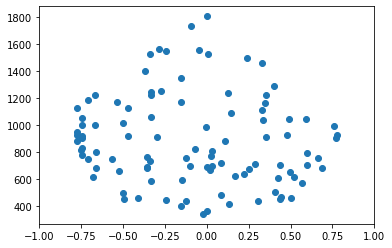

In [137]:
plt.plot((servs[:, 0] - servs[:, 1]) / (servs[:, 0] + servs[:, 1]), servs[:, 0] + servs[:, 1], 'o')
ax = plt.gca()
ax.set_xlim([-1, 1])
plt.show()

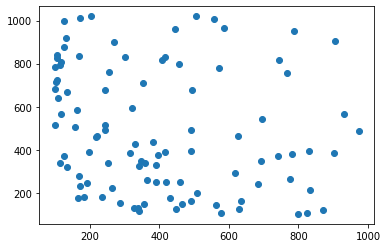

In [55]:
plt.scatter(servs[:, 0], servs[:, 1])
plt.show()

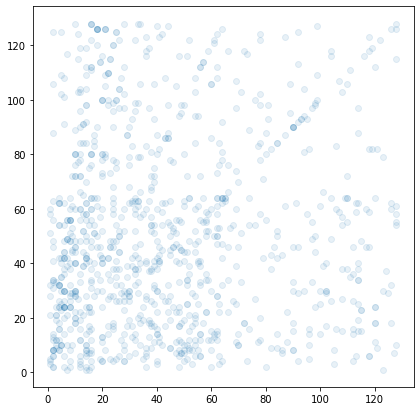

In [138]:
fig = plt.figure()
plt.scatter(vms[:, 0], vms[:, 1], alpha=0.1)
ax = plt.gca()
ax.set_aspect(1)
fig.set_figwidth(7)
fig.set_figheight(7)
plt.show()

In [62]:
vms[vm_ins].shape

(83463, 3)

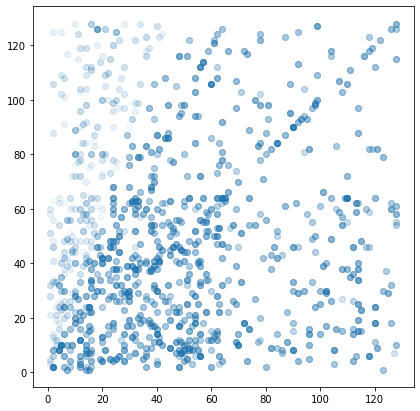

In [93]:
fig = plt.figure()
plt.scatter(vms[vm_ins][:, 0], vms[vm_ins][:, 1], alpha=0.05)
ax = plt.gca()
ax.set_aspect(1)
fig.set_figwidth(7)
fig.set_figheight(7)
plt.show()

In [108]:
dist = (servs[:, 0] - np.median(servs[:, 0]))**2 + (servs[:, 1] - np.median(servs[:, 1]))**2
idx_dist = np.argsort(dist)

In [111]:
servs[idx_dist]

array([[   330,    426, 125439,    132],
       [   382,    438, 128590,    192],
       [   314,    384, 116362,    122],
       [   396,    376,  94817,    205],
       [   416,    390, 131477,    195],
       [   346,    346, 109936,    165],
       [   358,    338, 122165,    128],
       [   340,    326,  80840,    175],
       [   390,    328, 107968,    163],
       [   252,    340,  95594,    100],
       [   490,    392, 162385,    169],
       [   242,    494,  77102,    167],
       [   218,    460, 101584,    105],
       [   220,    466, 102898,    107],
       [   364,    258,  79612,    173],
       [   244,    516,  95705,    145],
       [   490,    494, 121705,    265],
       [   196,    390,  61037,    132],
       [   390,    248,  83683,    182],
       [   420,    252,  89170,    192],
       [   320,    594, 119526,    178],
       [   458,    252, 126817,    191],
       [   262,    222,  78246,    118],
       [   158,    504,  64519,    141],
       [   168, 

In [125]:
idx = np.argsort(np.abs(serv_core_mem_ratios - 0.5))
servs[idx]

array([[   354,    708, 166791,    174],
       [   408,    816, 179239,    270],
       [   416,    832, 183088,    273],
       [   196,    390,  61037,    132],
       [   506,   1020, 208097,    312],
       [   242,    494,  77102,    167],
       [   218,    460, 101584,    105],
       [   244,    516,  95705,    145],
       [   220,    466, 102898,    107],
       [   444,    960, 188175,    280],
       [   320,    594, 119526,    178],
       [   558,   1006, 260849,    271],
       [   456,    796, 170212,    256],
       [   134,    322,  54362,     82],
       [   586,    964, 241036,    361],
       [   168,    276,  47614,    101],
       [   300,    830, 170076,    177],
       [   242,    676, 123319,    183],
       [   114,    340,  51836,     78],
       [   254,    760, 103216,    224],
       [   124,    372,  57168,     85],
       [   158,    504,  64519,    141],
       [   270,    902, 119029,    257],
       [   162,    584,  86285,    129],
       [   494, 

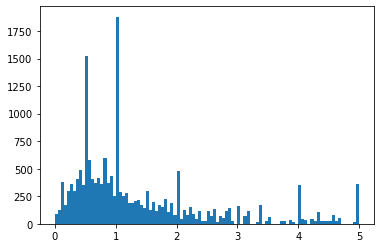

In [204]:
plt.hist(vm_ins_core_mem_ratios, bins=100, range=(0, 5))
plt.show()

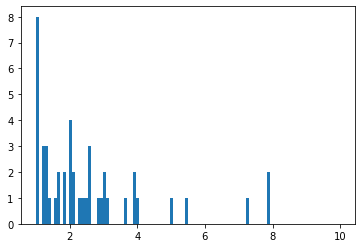

In [200]:
plt.hist(serv_core_mem_ratios, bins=100, range=(1, 10))
plt.show()

In [72]:
np.where(servs == 182)

(array([38, 38, 69], dtype=int64), array([0, 1, 3], dtype=int64))

In [22]:
330 / 426

0.7746478873239436

In [12]:
servs[]

array([  340,   326, 80840,   175])

In [12]:
vms.shape

(800, 3)

In [4]:
svms = []
dvms = []
for vm in vms:
    if vm[2] == 0:
        svms.append(vm.tolist())
    if vm[2] == 1:
        dvms.append(vm.tolist())
svms = np.array(svms)
dvms = np.array(dvms)

In [29]:
svms[:, 0].shape

(388,)

In [20]:
svms[:10, 0]

array([48, 63, 53, 64, 14, 40, 51, 96, 84, 82])

In [41]:
b_ub.shape

(3, 388)

In [5]:
c = svms[:, 0] + svms[:, 1]
A_ub = []
A_ub.append((svms[:, 0] + svms[:, 1]).tolist())
A_ub.append(svms[:, 0].tolist())
A_ub.append(svms[:, 1].tolist())
A_ub = np.array(A_ub)
b_ub = [servs[0][0] + servs[0][1], servs[0][0], servs[0][1]]
b_ub = np.array(b_ub)
A_eq = np.zeros_like(svms[:, 0])
b_eq = [0]
x = np.expand_dims(np.array([0, 10]), axis=0).repeat(388, axis=0)

In [23]:
b_ub

array([1130,  300,  830])

In [22]:
A_ub

array([[50, 66, 56, ..., 33, 59, 61],
       [48, 63, 53, ...,  1,  1,  1],
       [ 2,  3,  3, ..., 32, 58, 60]])

In [1]:
import math
from scipy.optimize import linprog
import sys

def integerPro(c, A, b, Aeq, beq,t=1.0E-12):
    # 求解松弛问题
    res = linprog(c, A_ub=A, b_ub=b, A_eq=Aeq, b_eq=beq)
    bestVal = sys.maxsize
    bestX = res.x
    if not(type(res.x) is float or res.status != 0): 
        bestVal = sum([x*y for x,y in zip(c, bestX)])
    # 停止条件 & bound
    if all(((x-math.floor(x))<t or (math.ceil(x)-x)<t) for x in bestX):
        return (bestVal,bestX)
    else:
        # 进行branch，这里简单选择第一个非整数变量
        ind = [i for i, x in enumerate(bestX) if (x-math.floor(x))>t and (math.ceil(x)-x)>t][0]
        # branch出两个子问题
        newCon1 = [0]*len(A[0])
        newCon2 = [0]*len(A[0])
        newCon1[ind] = -1
        newCon2[ind] = 1
        newA1 = A.copy()
        newA2 = A.copy()
        newA1.append(newCon1)
        newA2.append(newCon2)
        newB1 = b.copy()
        newB2 = b.copy()
        newB1.append(-math.ceil(bestX[ind]))
        newB2.append(math.floor(bestX[ind]))
        r1 = integerPro(c, newA1, newB1, Aeq, beq)
        r2 = integerPro(c, newA2, newB2, Aeq, beq)
        # tree search，这里使用width first
        if r1[0] < r2[0]:
            return r1
        else:
            return r2


In [17]:
A_eq.shape

(388,)

In [18]:
integerPro(c, A_ub, b_ub, None, None)

(1.2099403592059206e-12,
 array([2.51040335e-17, 2.29680853e-17, 2.81366254e-17, 2.54577456e-17,
        5.34759919e-18, 3.92506317e-17, 3.75948343e-17, 2.05134877e-17,
        2.39167810e-17, 2.47227459e-17, 2.39512448e-17, 1.84891608e-17,
        1.24016095e-16, 4.38381507e-17, 1.75514447e-16, 4.50278925e-17,
        4.75956841e-17, 4.22559477e-17, 3.27347086e-17, 2.24488862e-17,
        2.71342832e-17, 2.02107040e-17, 6.86085522e-17, 2.12816345e-17,
        1.47028398e-16, 5.35924589e-17, 3.89959776e-17, 1.25515405e-16,
        4.95354453e-17, 2.11162220e-17, 5.20653969e-17, 3.87077152e-17,
        2.76670150e-17, 3.67460273e-16, 3.33391549e-17, 2.35525735e-17,
        4.00933980e-17, 2.49041647e-17, 1.77301290e-16, 2.40022245e-17,
        2.49625538e-17, 2.69978652e-17, 2.65946621e-17, 2.40304269e-17,
        2.00682965e-16, 3.58875580e-17, 6.80435930e-17, 4.97153857e-17,
        3.12574628e-17, 9.92377484e-17, 3.40030798e-17, 2.73452753e-17,
        4.82247110e-17, 2.56385384e-17,

In [30]:
servs[0]

array([   300,    830, 170076,    442])

In [31]:
svms[0]

array([48,  2,  0])

In [ ]:
c = [3,4,1]
A = [[-1,-6,-2],[-2,0,0]]
b = [-5,-3]
Aeq = [[0,0,0]]
beq = [0]
print(integerPro(c, A, b, Aeq, beq))

In [79]:
svms

array([[48,  2,  0],
       [63,  3,  0],
       [53,  3,  0],
       ...,
       [ 1, 32,  0],
       [ 1, 58,  0],
       [ 1, 60,  0]])

In [76]:
 servs[1, 0] / 2

51.0

In [77]:
servs[1, 1] / 2

357.0

In [119]:
svms[[198, 226, 274, 383, 377]]

array([[ 7, 10,  0],
       [26, 52,  0],
       [ 1,  3,  0],
       [ 1, 28,  0],
       [ 2, 33,  0]])

In [1]:
from mip import *

In [140]:
m = Model(sense=MAXIMIZE)

In [141]:
x = [m.add_var(var_type=INTEGER, lb=0, ub=10) for i in range(388)]

In [82]:
# m += xsum((svms[i, 0] + svms[i, 1]) * x[i] for i in range(388)) <= servs[0, 0] + servs[0, 1]

In [146]:
svms[151, 0] = 0
svms[151, 1] = 0
svms[148, 0] = 0
svms[148, 1] = 0
svms[4, [0, 1]] = 0
svms[12, [0, 1]] = 0
svms[198, [0, 1]] = 0
svms[38, [0, 1]] = 0
svms[373, [0, 1]] = 0

In [147]:
m += xsum(svms[i, 0] * x[i] for i in range(388)) <= servs[2][0] / 2

In [148]:
m += xsum(svms[i, 1] * x[i] for i in range(388)) <= servs[2][1] / 2

In [149]:
m.objective = xsum((svms[i, 0] + svms[i, 1]) * x[i] for i in range(388))

In [150]:
m.max_gap = 0.05
status = m.optimize(max_seconds=300)
if status == OptimizationStatus.OPTIMAL:
    print('optimal solution cost {} found'.format(m.objective_value))
elif status == OptimizationStatus.FEASIBLE:
    print('sol.cost {} found, best possible: {}'.format(m.objective_value, m.objective_bound))
elif status == OptimizationStatus.NO_SOLUTION_FOUND:
    print('no feasible solution found, lower bound is: {}'.format(m.objective_bound))
if status == OptimizationStatus.OPTIMAL or status == OptimizationStatus.FEASIBLE:
    print('solution:')
    for v in m.vars:
        if abs(v.x) > 1e-6: # only printing non-zeros
            print('{} : {}'.format(v.name, v.x))

optimal solution cost 592.0 found
solution:
var(14) : 2.0
var(274) : 9.0
var(302) : 10.0
var(328) : 10.0
var(338) : 2.0
var(381) : 10.0
var(383) : 4.0


In [165]:
42 + 9 + 112 + 99 + 9 + 17 + 126

414

In [167]:
vms.shape

(800, 3)